# Bursty dynamics (random # of product molecules)

## Gillespie simulation

In [1]:
import numpy as np

from reactionmodel.model import Species, Reaction, Model

from hybrid.gillespie import GillespieSimulator

In [2]:
A = Species('A')
reactions = [
    Reaction([A], [(A, 100)], k=1.0),
    Reaction([A], [(A, 100)], k=2.0)
]
m = Model([A], reactions)

s = GillespieSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    poisson_products_mask=np.full(m.stoichiometry().shape[1], True)
)

In [3]:
np.full(m.stoichiometry().shape[1], True)

array([ True,  True])

In [4]:
rng = np.random.default_rng()

step_outputs = []
for i in range(500):
    r = s.simulate([0.0, 100.0], m.make_initial_condition({'A':10000.}), rng, halt=lambda t,y: (y > 10000).any())
    step_outputs.append(r.y[0]-10000)

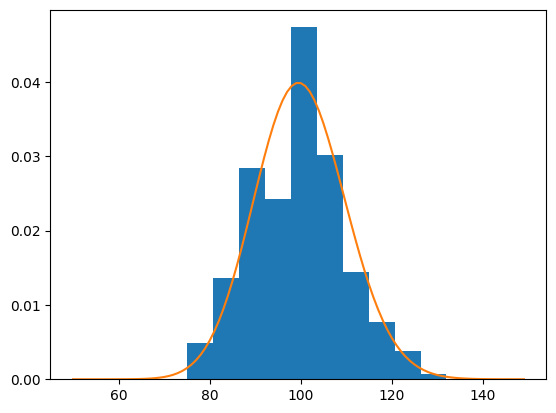

In [5]:
import matplotlib.pyplot as plt
import scipy.stats

fig, ax = plt.subplots()
ax.hist(step_outputs, density=True)

x = np.array(range(50, 150))
ax.plot(x, scipy.stats.poisson(100.0).pmf(x))

## Tau leaping

In [6]:
from hybrid.tau import TauLeapSimulator

s = TauLeapSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    poisson_products_mask=np.full(m.stoichiometry().shape[1], True)
)

In [7]:
s.simulate([0.0, 0.1], m.make_initial_condition({'A':100000.}), rng)

History(t=0.1, y=array([6.34888398e+17]), t_history=array([0.00000000e+00, 3.36700337e-05, 6.73400673e-05, ...,
       9.99326599e-02, 9.99663300e-02, 1.00000000e-01]), y_history=array([[1.00000000e+05, 1.00495000e+05, 1.01386000e+05, ...,
        6.22378590e+17, 6.28602376e+17, 6.34888398e+17]]), step_indices=array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.968e+03, 2.969e+03,
       2.970e+03]), status_history=array([nan,  2.,  2., ...,  2.,  2.,  0.]), pathway_history=array([inf, inf, inf, ..., inf, inf, inf]), status_counter=Counter({<TauStepStatus.leap: 2>: 2969, <TauStepStatus.t_end: 0>: 1}), pathway_counter=Counter({inf: 2971}))

## Hybrid simulator

In [36]:
from hybrid.hybrid import HybridSimulator, NThresholdPartitioner

In [32]:
A = Species('A')
reactions = [
    Reaction([A], [(A, 10)], k=1.0, poisson_products=True),
    Reaction([A], [], k=9.0)
]
m = Model([A], reactions)

s = GillespieSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    poisson_products_mask=m.poisson_products_mask
)

In [33]:
rng = np.random.default_rng()
r = s.simulate([0.0, 10.0], m.make_initial_condition({'A':100}), rng)

<Axes: >

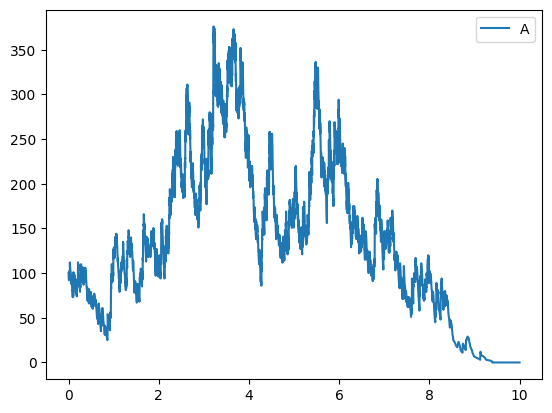

In [34]:
r.plot(m.legend())

In [40]:
h_s = HybridSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    poisson_products_mask=m.poisson_products_mask,
    partition_function=NThresholdPartitioner(200.0),
)

In [43]:
r = h_s.simulate([0.0, 10.0], m.make_initial_condition({'A':100}), rng)

<Axes: >

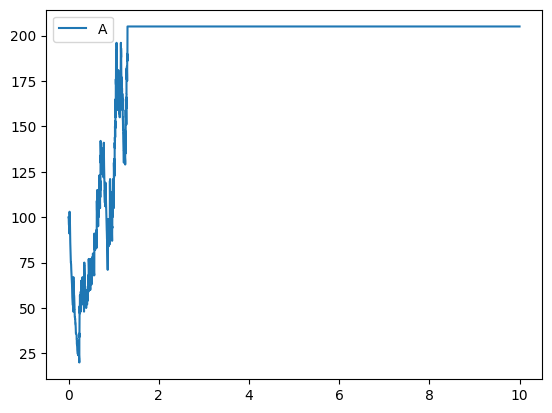

In [44]:
r.plot(m.legend())

In [45]:
r.y

array([205.])